# 8.1 Simulated Annealing (5 points)

In [46]:
import numpy as np
import matplotlib.pyplot as plt

In [52]:
# Intizialisation

# Parameters
b = 0.05
l = 1.1
tmax = 50
M = 1 # try also 500
N = 6

# random parameters
s = np.random.choice([-1,1],N)
W = np.random.rand(6,6)
for i in range(0,N):
    W[i,i] = 0

# function

In [36]:
beta = np.zeros(tmax)
energy = np.zeros(tmax)

In [55]:

for t in range(0,tmax):
    for m in range(1,M):
        # select random node
        i = np.random.choice(N,1)
        e = 0
        for j in range(0,N):
            if j!=i:
                e = e + w[i,j]*s[i]*s[j]
        e = -0.5*e
        delta_e = -2*e
        if 1/(1+np.exp(b*delta_e) > 0.5):
            e = e*-1
    beta[t] = b
    b = l*b

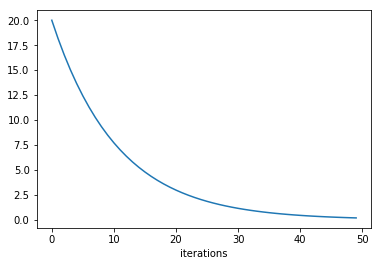

In [54]:
T = 1./beta
plt.plot(T)
plt.xlabel("iterations")
plt.show()

In [ ]:
# Plotting